In [1]:
# Importing modules
import pandas as pd
# ... YOUR CODE FOR TASK 1 ...

# Reading in datasets/book1.csv
book1 = pd.read_csv("datasets/book1.csv")

# Printing out the head of the dataset
book1.head()
# ... YOUR CODE FOR TASK 1 ...

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>


In [2]:
# Importing modules
import networkx as nx
# ... YOUR CODE FOR TASK 2 ...

# Creating an empty graph object
G_book1 = nx.Graph()

In [3]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## The most important character in Book 1 and Book 5
<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network science offers us many different metrics to measure the importance of a node in a network. </p>
<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. This measure of importance is called <em>degree centrality</em>.</p>


In [4]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their  degree centrality and extracting the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and extracting the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print("Book 1", sorted_deg_cen_book1)
print("Book 5", sorted_deg_cen_book5)

Book 1 [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
Book 5 [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## The evolution of character importance with degree centrality
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens… ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

<Axes: >

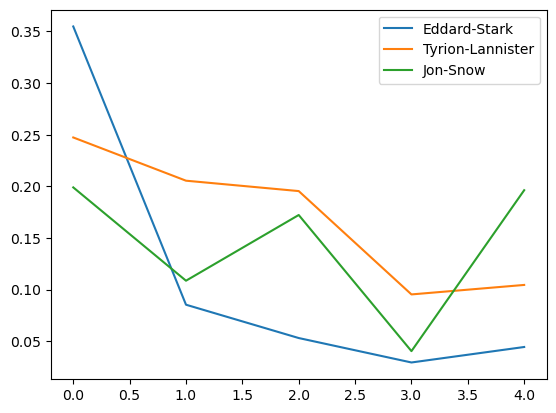

In [5]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## The evolution of character importance with betweenness centrality
<p>We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

<Axes: >

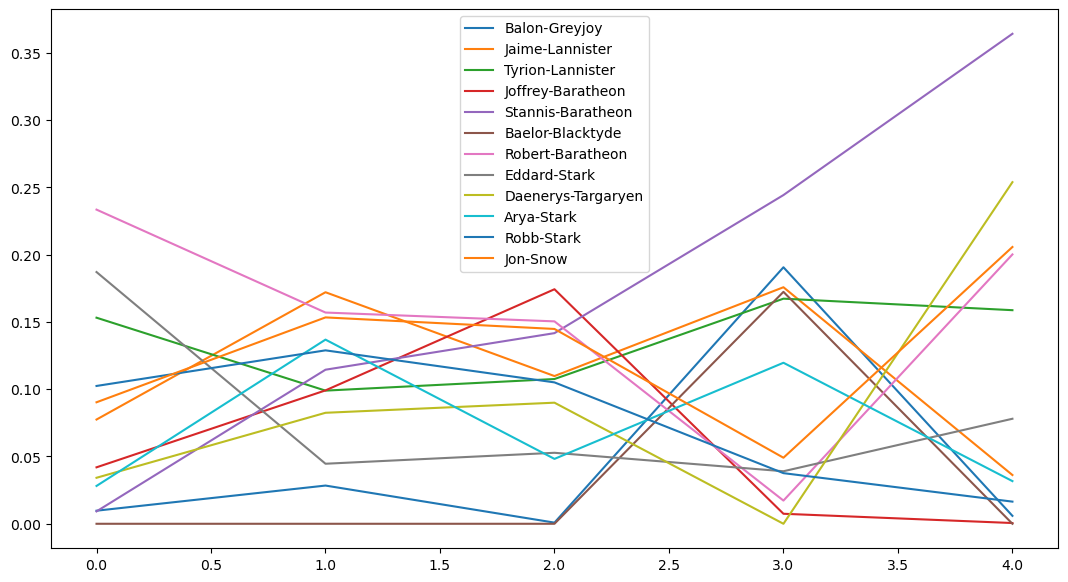

In [6]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

##  What does Google PageRank tell us about Character Importance?
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

<Axes: >

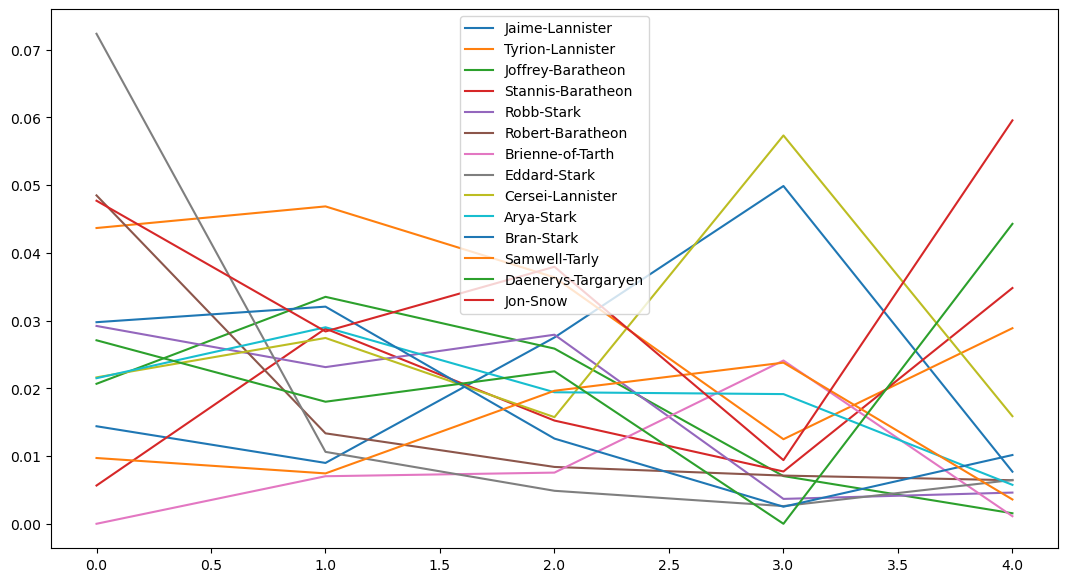

In [7]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

## Correlation between different measures
<p>Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

In [8]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## Important Character in Book 5 according to three measures
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
  The most important character(s) in the fifth book according to these three measures </p>

In [ ]:
# Finding the most important character in the fifth book,
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank)
print(b_cent)
print(d_cent)

### Network Analysis for all Books

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('datasets/complete.csv')  # Replace 'your_dataset.csv' with the path to your CSV file

# Create a directed graph
G = nx.DiGraph()

# Add edges from the dataset
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Calculate centrality degrees
centrality_degrees = dict(G.degree())

# Sort characters by centrality degree
sorted_characters = sorted(centrality_degrees.items(), key=lambda x: x[1], reverse=True)

# Display centrality degrees
print("Centrality degrees:")
for character, degree in sorted_characters:
    print(f"{character}: {degree}")

# Plot the network graph (optional)
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black")
plt.title("Network Graph")
plt.show()


Centrality degrees:
Tyrion-Lannister: 122
Jon-Snow: 114
Jaime-Lannister: 101
Cersei-Lannister: 97
Stannis-Baratheon: 89
Arya-Stark: 84
Catelyn-Stark: 75
Sansa-Stark: 75
Robb-Stark: 74
Eddard-Stark: 74
Daenerys-Targaryen: 73
Joffrey-Baratheon: 69
Theon-Greyjoy: 66
Robert-Baratheon: 65
Bran-Stark: 54
Tywin-Lannister: 48
Petyr-Baelish: 47
Brienne-of-Tarth: 45
Samwell-Tarly: 44
Barristan-Selmy: 41
Renly-Baratheon: 38
Sandor-Clegane: 36
Varys: 34
Mance-Rayder: 33
Davos-Seaworth: 33
Gregor-Clegane: 33
Tommen-Baratheon: 33
Margaery-Tyrell: 30
Rodrik-Cassel: 30
Jeor-Mormont: 28
Roose-Bolton: 28
Loras-Tyrell: 28
Pycelle: 27
Aemon-Targaryen-(Maester-Aemon): 26
Jorah-Mormont: 26
Asha-Greyjoy: 25
Bronn: 25
Victarion-Greyjoy: 24
Edmure-Tully: 24
Lysa-Arryn: 24
Janos-Slynt: 23
Ramsay-Snow: 23
Mace-Tyrell: 23
Melisandre: 23
Ilyn-Payne: 22
Myrcella-Baratheon: 22
Hizdahr-zo-Loraq: 22
Luwin: 22
Drogo: 21
Jory-Cassel: 21
Meryn-Trant: 21
Doran-Martell: 21
Oberyn-Martell: 20
Eddison-Tollett: 20
Amory-Lorch

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [35]:
# Import necessary libraries
import pandas as pd
import networkx as nx

# Load the dataset
file_path = 'datasets/complete.csv'  # Make sure to replace this with your actual file path
df = pd.read_csv(file_path)

# Create a graph from the dataset
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr=True)

# Calculate the degree of each node (character) as a whole number
degrees = dict(G.degree())

# Optionally, you can sort the characters by their degree
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Print each character and their number of neighbors
for character, num_neighbors in sorted_degrees:
    print(f"Name: {character}, Neighbors: {num_neighbors}")


Name: Tyrion-Lannister, Neighbors: 122
Name: Jon-Snow, Neighbors: 114
Name: Jaime-Lannister, Neighbors: 101
Name: Cersei-Lannister, Neighbors: 97
Name: Stannis-Baratheon, Neighbors: 89
Name: Arya-Stark, Neighbors: 84
Name: Catelyn-Stark, Neighbors: 75
Name: Sansa-Stark, Neighbors: 75
Name: Robb-Stark, Neighbors: 74
Name: Eddard-Stark, Neighbors: 74
Name: Daenerys-Targaryen, Neighbors: 73
Name: Joffrey-Baratheon, Neighbors: 69
Name: Theon-Greyjoy, Neighbors: 66
Name: Robert-Baratheon, Neighbors: 65
Name: Bran-Stark, Neighbors: 54
Name: Tywin-Lannister, Neighbors: 48
Name: Petyr-Baelish, Neighbors: 47
Name: Brienne-of-Tarth, Neighbors: 45
Name: Samwell-Tarly, Neighbors: 44
Name: Barristan-Selmy, Neighbors: 41
Name: Renly-Baratheon, Neighbors: 38
Name: Sandor-Clegane, Neighbors: 36
Name: Varys, Neighbors: 34
Name: Mance-Rayder, Neighbors: 33
Name: Davos-Seaworth, Neighbors: 33
Name: Gregor-Clegane, Neighbors: 33
Name: Tommen-Baratheon, Neighbors: 33
Name: Margaery-Tyrell, Neighbors: 30
Na

In [ ]:
pip install python-louvain


In [41]:
from community import community_louvain
import re
# Extract family names from the "Source" column, with special handling for known cases
def extract_family(name):
    # Special case mentioned
    if name == 'Aemon-Targaryen-(Maester-Aemon)':
        return 'Targaryen'
    # General extraction rule
    match = re.search(r'([A-Za-z]+)$', name.replace('-', ' '))
    if match:
        return match.group(1)
    return 'No family'

# Apply the function to extract family names
df['Family'] = df['Source'].apply(extract_family)

# Create a graph
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr=True)

# Detect communities (groups)
partitions = community_louvain.best_partition(G)

# Assign group information to nodes
for node in G.nodes():
    G.nodes[node]['Group'] = partitions[node]
    G.nodes[node]['Family'] = extract_family(node)

# Create a new DataFrame from the graph nodes with Name, Family, and Group
nodes_data = [{"Name": node, "Family": data['Family'], "Group": data['Group']} for node, data in G.nodes(data=True)]
nodes_df = pd.DataFrame(nodes_data)

nodes_df


,Name,Family,Group
0,Addam-Marbrand,Marbrand,1
1,Brynden-Tully,Tully,1
2,Cersei-Lannister,Lannister,2
3,Gyles-Rosby,Rosby,2
4,Jaime-Lannister,Lannister,1
...,...,...,...
791,Talbert-Serry,Serry,14
792,Willow-Witch-eye,eye,14
793,Thistle,Thistle,11
794,Tion-Frey,Frey,8


In [84]:
# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Identify top 10 key players based on betweenness centrality
key_players = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
key_player_names = [kp[0] for kp in key_players]

# Update our DataFrame to include 'Central' and 'Keyplayer' columns
# For simplicity, every node with non-zero betweenness centrality could be considered 'Central'
nodes_df['Central'] = nodes_df['Name'].apply(lambda x: betweenness_centrality.get(x, 0) > 0)
nodes_df['Keyplayer'] = nodes_df['Name'].isin(key_player_names)

# Display the updated DataFrame with 'Central' and 'Keyplayer' columns
#nodes_df[['Name', 'Central', 'Keyplayer']].head()


In [38]:
# Calculate Degree Centrality for each node. Degree centrality values are normalized by default in NetworkX,
# which means they are divided by (n-1) where n is the number of nodes. We'll convert them to whole numbers
# by multiplying by (n-1) for consistency with the request.
n_minus_one = len(G.nodes()) - 1
degree_centrality = nx.degree_centrality(G)
# Convert normalized centrality to whole numbers
degree_centrality_whole = {k: int(v * n_minus_one) for k, v in degree_centrality.items()}

# Add the Degree Centrality to the DataFrame
nodes_df['Neighbors'] = nodes_df['Name'].map(degree_centrality_whole)

nodes_df


,Name,Family,Group,Central,Keyplayer,Neighbors
0,Addam-Marbrand,Marbrand,3,True,False,12
1,Brynden-Tully,Tully,1,True,False,19
2,Cersei-Lannister,Lannister,3,True,True,97
3,Gyles-Rosby,Rosby,3,True,False,18
4,Jaime-Lannister,Lannister,3,True,True,101
...,...,...,...,...,...,...
791,Talbert-Serry,Serry,12,False,False,1
792,Willow-Witch-eye,eye,1,False,False,1
793,Thistle,Thistle,9,False,False,1
794,Tion-Frey,Frey,7,False,False,1


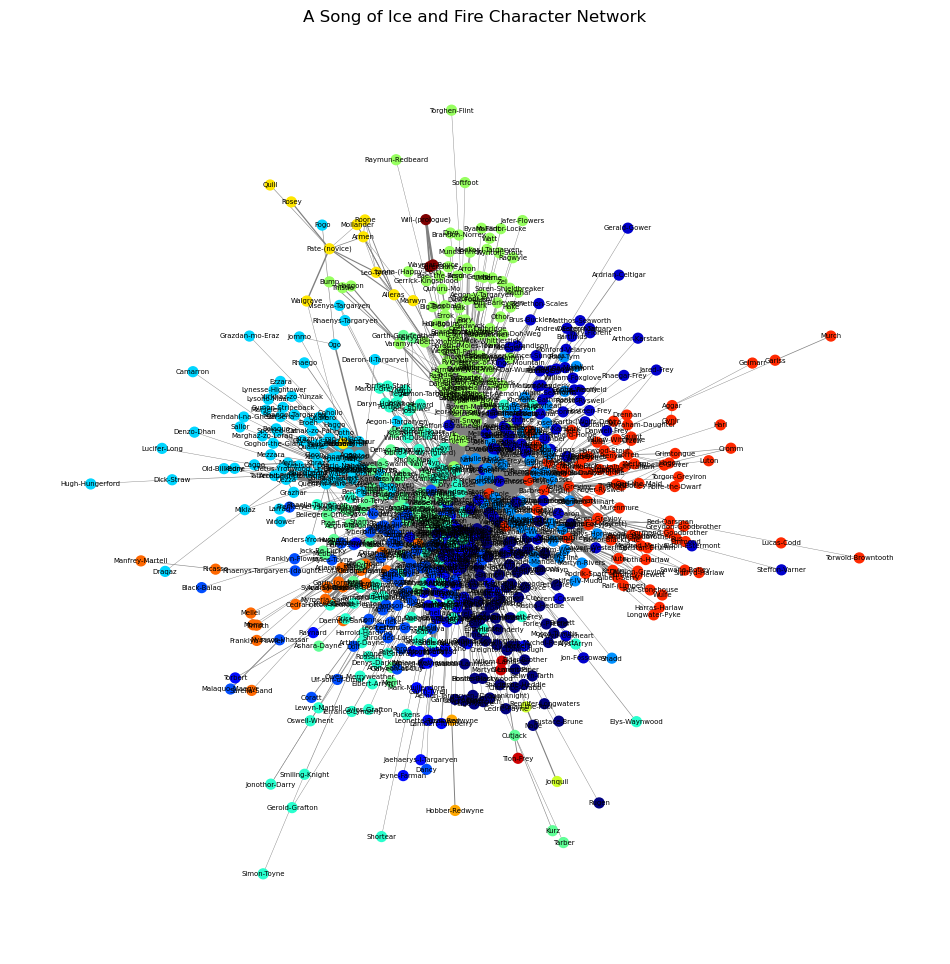

In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Since the dataset path and the dataset itself are not provided, we will assume that the dataset has been loaded correctly into df
df=pd.read_csv('datasets/complete.csv')
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming df is your original dataframe with 'Source', 'Target', and 'weight' columns
# and nodes_df_corrected contains 'Name', 'Group', and potentially 'Weight' for each node

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['weight'])

# For coloring nodes based on their group, first map each node to its group
group_dict = nodes_df.set_index('Name')['Group'].to_dict()
colors = [group_dict[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
positions = nx.spring_layout(G, seed=42)  # For consistent layout

# Draw nodes
nx.draw_networkx_nodes(G, positions, node_color=colors, cmap=plt.cm.jet, node_size=50)

# Draw edges
edges = nx.draw_networkx_edges(G, positions, arrowstyle="->", arrowsize=10,
                               edge_color="gray", width=[(G[u][v]['weight'] / 10) for u, v in G.edges()])

# Draw labels
nx.draw_networkx_labels(G, positions, font_size=5, font_color="black")


plt.title('A Song of Ice and Fire Character Network')
plt.axis('off')  # Turn off the axis
plt.show()

### Top Clusters in Network

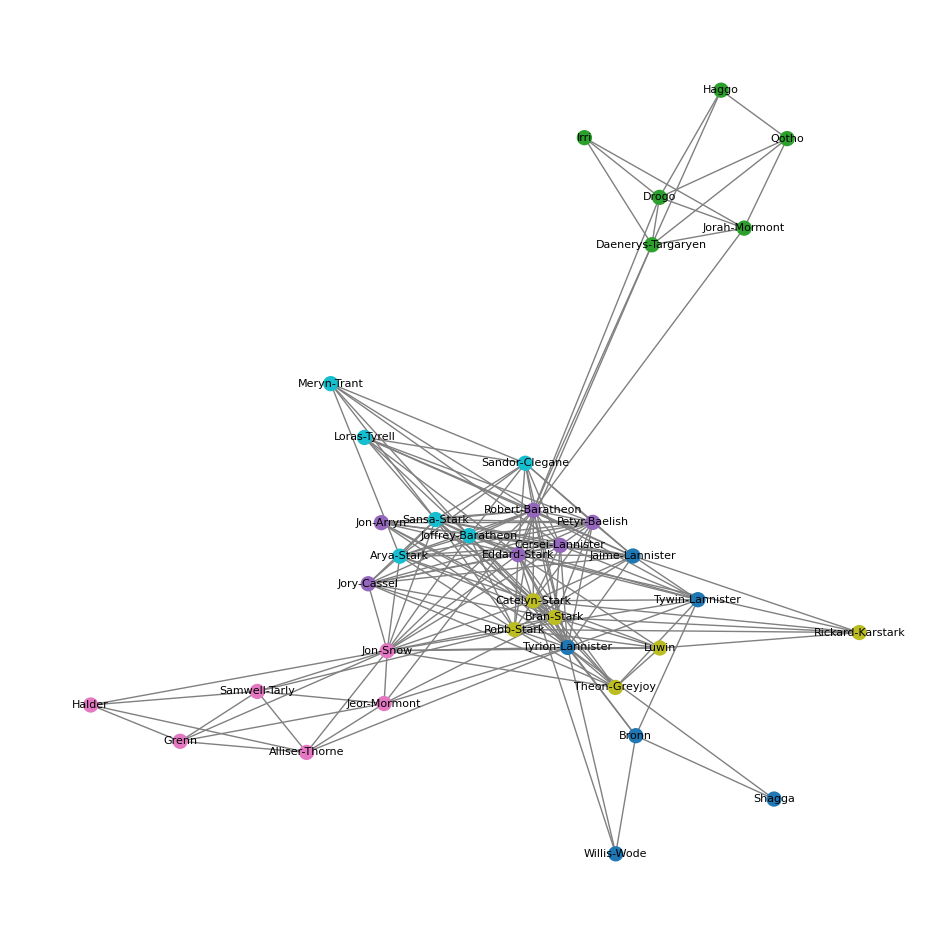

In [83]:
# Assuming nodes_df has a 'Weight' column indicating the importance of each node
# If not, we might use a centrality measure from the graph G

# First, let's find the top 10 groups by the number of members
top_groups = nodes_df['Group'].value_counts().head(10).index.tolist()

# For each group, we'll find the most important members
important_names_by_group = {}
for group in top_groups:import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from community import community_louvain

# Assuming 'df' is already loaded with 'Source', 'Target', and 'weight' columns

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='weight')

# Detect communities
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'cluster')

# Identify top 10 clusters based on their size
clusters = pd.Series(partition).value_counts().head(6).index.tolist()

# For each cluster, select 5 names based on degree centrality
selected_nodes = []
for cluster in clusters:
    nodes_in_cluster = [node for node, cluster_id in partition.items() if cluster_id == cluster]
    subgraph = G.subgraph(nodes_in_cluster)
    centrality = nx.degree_centrality(subgraph)
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:6]
    selected_nodes.extend(top_nodes)

# Create a subgraph with the selected nodes and their connections
subG = G.subgraph(selected_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 12))
positions = nx.spring_layout(subG, seed=42)  # For consistent layout

# Nodes
nx.draw_networkx_nodes(subG, positions, node_size=100, node_color=[partition[node] for node in subG.nodes()], cmap=plt.cm.tab10)

# Edges
nx.draw_networkx_edges(subG, positions, edge_color="gray")

# Labels
nx.draw_networkx_labels(subG, positions, font_size=8)

plt.axis('off')
plt.show()

# Filter nodes_df for the current group and sort by 'Weight' to find the most important members
important_names = nodes_df[nodes_df['Group'] == group].sort_values(by='Weight', ascending=False)['Name'].head().tolist()
important_names_by_group[group] = important_names




### Degree Centrality,Betweenness Centrality and Page Rank value for all characters in Books 1-5

In [71]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Your dataset


# Creating a DataFrame
df = pd.read_csv('datasets/book1.csv')

# Creating a graph
G = nx.Graph()

# Adding edges
for i, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
page_rank = nx.pagerank(G)

# Converting metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Character': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'PageRank': list(page_rank.values())
}).sort_values('Degree Centrality', ascending=False)  # Sorting by Degree Centrality for visual clarity

metrics_df.head(20)


,Character,Degree Centrality,Betweenness Centrality,PageRank
5,Eddard-Stark,0.354839,0.269604,0.072362
18,Robert-Baratheon,0.268817,0.214030,0.048494
30,Tyrion-Lannister,0.247312,0.190212,0.043676
39,Catelyn-Stark,0.231183,0.151395,0.034667
12,Jon-Snow,0.198925,0.171581,0.047708
51,Robb-Stark,0.188172,0.072984,0.029214
54,Sansa-Stark,0.188172,0.037145,0.026945
38,Bran-Stark,0.172043,0.055800,0.029770
40,Cersei-Lannister,0.161290,0.026435,0.021620
44,Joffrey-Baratheon,0.161290,0.018949,0.020672


In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Your dataset


# Creating a DataFrame
df = pd.read_csv('datasets/book2.csv')

# Creating a graph
G = nx.Graph()

# Adding edges
for i, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
page_rank = nx.pagerank(G)

# Converting metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Character': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'PageRank': list(page_rank.values())
}).sort_values('Degree Centrality', ascending=False)  # Sorting by Degree Centrality for visual clarity

metrics_df.head(20)


,Character,Degree Centrality,Betweenness Centrality,PageRank
4,Tyrion-Lannister,0.205426,0.155324,0.046869
52,Joffrey-Baratheon,0.182171,0.090782,0.033514
56,Cersei-Lannister,0.166667,0.063529,0.027441
14,Arya-Stark,0.155039,0.188112,0.029019
46,Stannis-Baratheon,0.143411,0.119514,0.028821
85,Robb-Stark,0.135659,0.164941,0.023135
103,Catelyn-Stark,0.127907,0.111044,0.021741
17,Theon-Greyjoy,0.124031,0.144395,0.027660
45,Renly-Baratheon,0.120155,0.071694,0.022946
38,Bran-Stark,0.116279,0.113235,0.032065


In [86]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Your dataset


# Creating a DataFrame
df = pd.read_csv('datasets/book3.csv')

# Creating a graph
G = nx.Graph()

# Adding edges
for i, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
page_rank = nx.pagerank(G)

# Converting metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Character': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'PageRank': list(page_rank.values())
}).sort_values('Degree Centrality', ascending=False)  # Sorting by Degree Centrality for visual clarity

metrics_df.head(20)


,Character,Degree Centrality,Betweenness Centrality,PageRank
7,Tyrion-Lannister,0.195364,0.154091,0.036393
32,Jon-Snow,0.172185,0.223829,0.037954
4,Joffrey-Baratheon,0.165563,0.141891,0.025867
11,Robb-Stark,0.162252,0.162321,0.027922
62,Sansa-Stark,0.158940,0.089603,0.025732
2,Jaime-Lannister,0.149007,0.124491,0.027516
50,Cersei-Lannister,0.125828,0.024580,0.015746
10,Catelyn-Stark,0.125828,0.074938,0.018832
72,Arya-Stark,0.122517,0.094787,0.019424
16,Stannis-Baratheon,0.102649,0.109017,0.015241


In [87]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Your dataset


# Creating a DataFrame
df = pd.read_csv('datasets/book4.csv')

# Creating a graph
G = nx.Graph()

# Adding edges
for i, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
page_rank = nx.pagerank(G)

# Converting metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Character': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'PageRank': list(page_rank.values())
}).sort_values('Degree Centrality', ascending=False)  # Sorting by Degree Centrality for visual clarity

metrics_df.head(20)


,Character,Degree Centrality,Betweenness Centrality,PageRank
3,Jaime-Lannister,0.234432,0.242819,0.049880
2,Cersei-Lannister,0.219780,0.275480,0.057348
120,Brienne-of-Tarth,0.102564,0.109834,0.024111
152,Tyrion-Lannister,0.095238,0.091159,0.012489
39,Margaery-Tyrell,0.091575,0.036014,0.018867
91,Sansa-Stark,0.087912,0.152754,0.012997
108,Tommen-Baratheon,0.087912,0.057888,0.019658
14,Samwell-Tarly,0.073260,0.140178,0.023794
107,Stannis-Baratheon,0.073260,0.276306,0.007722
66,Petyr-Baelish,0.069597,0.069009,0.013619


In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Your dataset


# Creating a DataFrame
df = pd.read_csv('datasets/book5.csv')

# Creating a graph
G = nx.Graph()

# Adding edges
for i, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Calculating metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
page_rank = nx.pagerank(G)

# Converting metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Character': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'PageRank': list(page_rank.values())
}).sort_values('Degree Centrality', ascending=False)  # Sorting by Degree Centrality for visual clarity

metrics_df.head(20)


,Character,Degree Centrality,Betweenness Centrality,PageRank
20,Jon-Snow,0.196203,0.244849,0.059572
1,Daenerys-Targaryen,0.183544,0.295946,0.044292
22,Stannis-Baratheon,0.148734,0.452831,0.034819
12,Tyrion-Lannister,0.104430,0.209616,0.028882
25,Theon-Greyjoy,0.104430,0.109959,0.025041
151,Cersei-Lannister,0.088608,0.155657,0.015888
33,Barristan-Selmy,0.079114,0.043218,0.015527
103,Hizdahr-zo-Loraq,0.069620,0.015870,0.016476
43,Asha-Greyjoy,0.056962,0.089418,0.013007
40,Melisandre,0.053797,0.016543,0.011203
